# Session 4 - Functional programming

You are motivated to use generators and generator expressions as well as zip, map and filter built-in functions and also itertools and functools modules.

In [27]:
from functools import reduce
import random

## Task 1 (5 points)
Use functional tools to implement discrete convolution of two lists of numerical values (e.g. $\sum_{i= 0}^n a_i \cdot b_{n-i}$)

In [28]:
n = 10
A = [random.randint(1,10) for i in range(n)]
B = [random.randint(1,10) for i in range(n)]
print(A)
print(B)

[4, 10, 9, 3, 6, 10, 8, 10, 2, 10]
[1, 8, 5, 9, 4, 4, 8, 9, 9, 8]


In [29]:
%%timeit -r 50
# common approach
s = 0
for i in range(n):
    s += A[i]*B[n-i-1]

2.98 µs ± 274 ns per loop (mean ± std. dev. of 50 runs, 100000 loops each)


In [30]:
s = 0
for i in range(n):
    s += A[i]*B[n-i-1]
print(s)

439


In [31]:
%%timeit -r 50
# with  functional tools 
s = sum((map(lambda x,y: x*y, A, B[::-1])))

2.72 µs ± 279 ns per loop (mean ± std. dev. of 50 runs, 100000 loops each)


In [32]:
s = sum((map(lambda x,y: x*y, A, B[::-1])))
print(s)

439


## Task 2 (5 points)
Use functional tools to implement function, which calculates multiplication of two matrices

In [33]:
n, m, p = 2, 3, 4
A = [[random.randint(1,10) for i in range(m)] for i in range(n)]
B = [[random.randint(1,10) for i in range(p)] for i in range(m)]
def print_matrix(A):
    for el in A:
        print(el)
print('A:')
print_matrix(A)
print('B:')
print_matrix(B)

A:
[7, 3, 4]
[3, 9, 7]
B:
[1, 2, 3, 10]
[1, 5, 1, 5]
[8, 10, 7, 7]


In [34]:
%%timeit -r 10
# common aproach
result = [[0] * p  for i in range(n)]
for i in range(len(A)):
    for j in range(len(B[0])):
        for k in range(len(B)):
            result[i][j] += A[i][k] * B[k][j]

17.6 µs ± 1.8 µs per loop (mean ± std. dev. of 10 runs, 100000 loops each)


In [35]:
result = [[0] * p  for i in range(n)]
for i in range(len(A)):
    for j in range(len(B[0])):
        for k in range(len(B)):
            result[i][j] += A[i][k] * B[k][j]
print('res:')
print_matrix(result)

res:
[42, 69, 52, 113]
[68, 121, 67, 124]


In [36]:
%%timeit -r 10
# with  functional tools
result = [[sum(a * b for a, b in zip(A_row, B_col)) 
           for B_col in zip(*B)] for A_row in A]

15.2 µs ± 1.46 µs per loop (mean ± std. dev. of 10 runs, 100000 loops each)


In [37]:
result = [[sum(a * b for a, b in zip(A_row, B_col)) 
           for B_col in zip(*B)] for A_row in A]
print('res:')
print_matrix(result)

res:
[42, 69, 52, 113]
[68, 121, 67, 124]


## Task 3 (5 points)
Write a generator for the Cauchy product of two random number generators (https://en.wikipedia.org/wiki/Cauchy_product)

In [38]:
n = 10
A = [random.randint(1,10) for i in range(n)]
B = [random.randint(1,10) for i in range(n)]
print(A)
print(B)
Cauchy = (sum(x * y for x, y in zip(A[:k+1], B[:k+1][::-1])) for k in range(n))
print(list(Cauchy))

[7, 10, 8, 3, 6, 2, 1, 3, 8, 4]
[5, 7, 5, 7, 9, 7, 10, 6, 9, 10]
[35, 99, 145, 170, 224, 262, 282, 299, 358, 396]


## Task 4 (5 points)
Write generator function, which yields contents of all files of specific type in a given folder. Use this function to load one by one the contents of the CSV files stored in the Data folder and print the number of sample values in time-series data stored in each file and their average value.


In [15]:
import os

In [39]:
# get_file function_generator
def get_file(directory, need_type):
    for _, _, files in os.walk(directory):
        for file in files:
            if file.endswith('.' + need_type):
                yield directory +'/'+ file

In [40]:
need_type = 'csv'
directory = './Data'

In [41]:
# read information to list
List_files = [(name,[float(x) for x in wrapper]) for wrapper, name 
          in ((open(file), file) for file in (f for f in get_file('Data', 'csv')))]

In [42]:
# read information to dict
Dict_files = {name: [float(x) for x in wrapper] for wrapper, name 
          in ((open(file), file) for file in (f for f in get_file('Data', 'csv')))}

In [43]:
# Information
for i in Dict_files.keys():
    print('=' * 20)
    print(i)
    l = len(Dict_files[i])
    print('Len = ', l)
    print(reduce(lambda x, y: x + y, Dict_files[i]) / l)
    print('=' * 20)

Data/Sample_4.csv
Len =  10000
0.08796882619023505
Data/Sample_5.csv
Len =  10000
0.042725907958939754
Data/Sample_3.csv
Len =  10000
0.08957826558299582
Data/Sample_1.csv
Len =  10000
1.9970213675529882
Data/Sample_2.csv
Len =  10000
-0.006486319484654802
Data/Sample_6.csv
Len =  10000
0.009367580850572524


## Task 5 (5 points)
Write generator function, which yields a random sequence imitating a random walk. For example, it can resemble a stock exchange or currency exchange time series data.

https://machinelearningmastery.com/gentle-introduction-random-walk-times-series-forecasting-python/

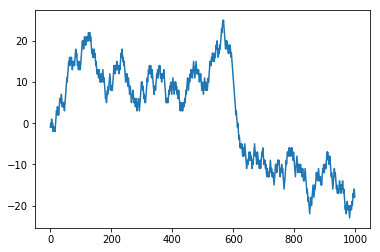

In [46]:
from matplotlib import pyplot
def random_walk(random_seed = 1):
    # установка начального значения генератора, чтобы каждый раз было одно и тоже
    seed(random_seed)
    random_walk = list()
    random_walk.append(-1 if random.random() < 0.5 else 1)
    for i in range(1, 1000):
        movement = -1 if random.random() < 0.5 else 1
        value = random_walk[i-1] + movement
        random_walk.append(value)
    return random_walk
pyplot.plot(random_walk(3))
pyplot.show()